In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\rojas\.cache\kagglehub\datasets\elikplim\car-evaluation-data-set\versions\1


In [4]:
df_car = pd.read_csv('C:\\Users\\rojas\\.cache\\kagglehub\\datasets\\elikplim\\car-evaluation-data-set\\versions\\1\\car_evaluation.csv')
df_car.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [5]:
df_car.shape

(1727, 7)

In [6]:
columns_name = ['buying','maint','doors','persons','lug_boot','safety','class']
df_car.columns = columns_name
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [7]:
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [8]:
df_car['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
X = df_car.drop(['class','buying','maint','doors','lug_boot'], axis=1)
y = df_car['class']

In [12]:
X.head()

,persons,safety
0,2,med
1,2,high
2,2,low
3,2,med
4,2,high


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [14]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1208, 2) (519, 2)
(1208,) (519,)


In [15]:
X_train.head()

,persons,safety
1177,4,high
585,more,med
1551,4,med
727,more,high
707,2,low


In [16]:
X_train.dtypes

persons    object
safety     object
dtype: object

In [17]:
# import category_encoders as ce
# encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.fit_transform(X_test)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
X_train=pd.DataFrame(ord_enc.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(ord_enc.fit_transform(X_test), columns=X_test.columns)



In [19]:
X_train.dtypes

persons    float64
safety     float64
dtype: object

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=0)


In [21]:
tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [23]:
print(y_train_pred_tree)

['acc' 'unacc' 'unacc' ... 'unacc' 'unacc' 'acc']


## Evaluacion del modelo

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

train_accuracy_tree = accuracy_score(y_train,y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test,y_test_pred_tree)
train_f1_tree = f1_score(y_train, y_train_pred_tree, average='weighted')
test_f1_tree = f1_score(y_test, y_test_pred_tree, average='weighted')

print("El accuracy en train tree es ", train_accuracy_tree)
print("El accuracy en test tree es ", test_accuracy_tree)
print("El f1 score en train tree es: ", train_f1_tree)
print("El f1 score en test tree es: ", test_f1_tree)

El accuracy en train tree es  0.7673841059602649
El accuracy en test tree es  0.7726396917148363
El f1 score en train tree es:  0.7329676594491352
El f1 score en test tree es:  0.739057010087272


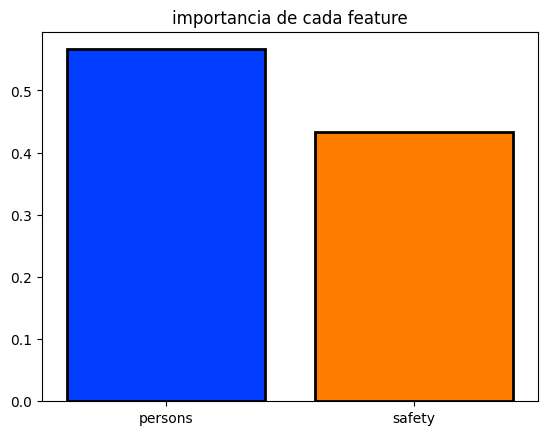

In [25]:
importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)

sns.barplot(data, palette='bright', saturation=2.0, edgecolor ='black', linewidth =2)
plt.title('importancia de cada feature')
plt.show()